### 1. Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import timedelta

### 2. Loading the data and data cleaning

In [2]:
data = pd.read_csv('dataset/weather-sa-2017-2019-clean.csv')
data.shape

(249023, 15)

In [3]:
data.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


#### Data cleansing

It show that we have 10 Numerical with int and float variable and 5 Categorical variable with object datatype

In [5]:
#replace space to NULL if found
data = data.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)


We notice that `humidity` is object so we will convert to numerical and remove the %
data.info()

In [6]:
data['humidity'] = data['humidity'].str.replace('%',' ').astype('float')

## 2.2  Drop irrelated features

- Unnamed column in the index of the data and we do not need it because datafram hundle that.
- I also remove the follwing columns because not need them since it represt the date & time.

In [7]:
delete_col =['Unnamed: 0','date','time' ]
data.drop(delete_col, axis =1 , inplace =True)

### 2.3 Dealing with missing values

In [8]:
data.isnull().sum()

city           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

- We have 17 missing value on humidity and 72 missing value in barometer
- I decide to get means of the humidity and barimeter per each city.

In [9]:
# Here to display the means per city.
data.groupby(by='city')['humidity','barometer'].mean().reset_index()

/var/folders/fh/fd9hxlg15d74w6xz3bkb3zbr0000gn/T/ipykernel_22179/360510210.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(by='city')['humidity','barometer'].mean().reset_index()


,city,humidity,barometer
0,Assir,47.590154,1023.498147
1,Baha,38.722982,1019.012376
2,EP,45.092703,1008.609077
3,Hail,41.536087,1013.528736
4,Jawf,30.500442,1015.505283
5,Jazan,45.803066,1023.087145
6,Madina,19.971600,1014.141254
7,Mecca,54.158772,1008.713919
8,Najran,45.953645,1023.093818
9,Northern boarder,26.263764,1012.641971


In [10]:
# now filling the missing values with means for each city
data['humidity'] = data['humidity'].fillna(data.groupby('city')['humidity'].transform('mean'))
data['barometer'] = data['barometer'].fillna(data.groupby('city')['barometer'].transform('mean'))

In [11]:
data.isnull().sum()

city          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

## Weather data and create the target

### 2.3 deal with target column

- it seems that the weather column in the dataset represents the weather phenomena, which is in a text format. and multiple phenomena merged together. So we will extract the keywords "rain" and it's synonyms and placed in a new column shows the result whether is rained or not raind on that day.

In [12]:
import re
data['rain'] = data['weather'].str.contains('rain|shower|sprinkle|thunderstorm', case = False ,regex=True)

- lets check a sample

In [13]:
data.groupby('weather')['rain'].unique().sample(20)

weather
Cool                                 [False]
Fog                                  [False]
Sandstorm                            [False]
Dense fog                            [False]
Low level haze                       [False]
Light rain  More clouds than sun      [True]
Rain  Overcast                        [True]
Heavy rain  Overcast                  [True]
Partly cloudy                        [False]
Mild                                 [False]
Passing clouds                       [False]
Thundershowers  Partly sunny          [True]
Thunderstorms  Cloudy                 [True]
Drizzle  Fog                         [False]
Strong thunderstorms  Cloudy          [True]
Cloudy                               [False]
Heavy rain  More clouds than sun      [True]
Thunderstorms  Scattered clouds       [True]
Rain showers  Partly sunny            [True]
Light rain  Passing clouds            [True]
Name: rain, dtype: object

In [14]:
# now we don't need weather column and I have droped it

In [15]:
data.drop('weather', axis =1 , inplace =True)

In [16]:
data.head()

,city,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
0,Qassim,2017,1,1,24,0,17,11,64.0,1018.0,16,False
1,Qassim,2017,1,1,1,0,17,6,64.0,1018.0,16,False
2,Qassim,2017,1,1,3,0,15,11,72.0,1019.0,16,False
3,Qassim,2017,1,1,4,0,15,11,72.0,1019.0,16,False
4,Qassim,2017,1,1,5,0,15,9,72.0,1019.0,16,False


### 3. EDA

- `city`, `rain` are categorical variables.
- `rain` is the target variable.

 discover the categorical varable `city`

In [17]:
print('city contains', len(data['city'].unique()), 'labels')

city contains 13 labels


In [18]:
data['city'].value_counts()

Jawf                20352
Mecca               20268
Tabuk               20240
Northern boarder    20235
Hail                20121
Madina              19965
Baha                19959
Najran              19847
Jazan               19829
Qassim              19793
EP                  18505
Riyadh              16421
Assir               13488
Name: city, dtype: int64

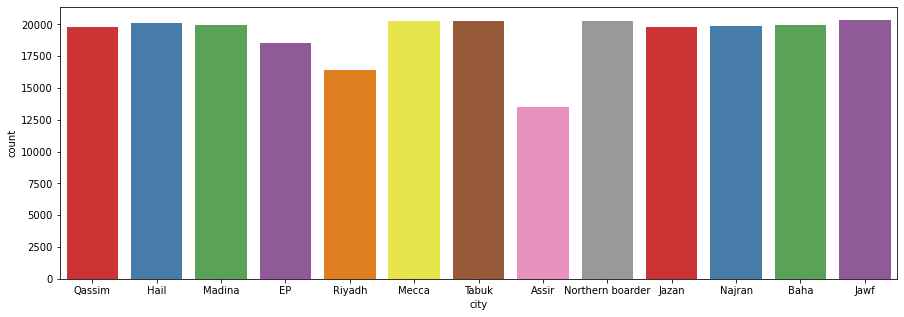

In [19]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="city", data=data, palette="Set1")
plt.show()

let do One Hot Encoding for the city variable.

In [20]:
pd.get_dummies(data['city'], drop_first=True).head()

,Baha,EP,Hail,Jawf,Jazan,Madina,Mecca,Najran,Northern boarder,Qassim,Riyadh,Tabuk
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0


 discover the categorical varable `rain`

In [21]:
print('rain contains', len(data['rain'].unique()), 'labels')

rain contains 2 labels


In [22]:
data['rain'].value_counts()

False    245654
True       3369
Name: rain, dtype: int64

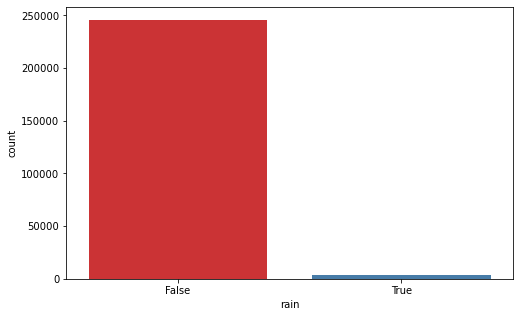

In [23]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="rain", data=data, palette="Set1")
plt.show()

In [24]:
#
X = data.drop(['rain'], axis=1)
y = data['rain']

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
#sample = rus.sample(sample,sample('rain'))
#X_resampled, y_resampled = rus.sample(sample, sample[['rain']])
X_resampled, y_resampled = rus.fit_resample(X, y)

data_resampled = pd.concat([X_resampled,y_resampled], axis =1)
#new

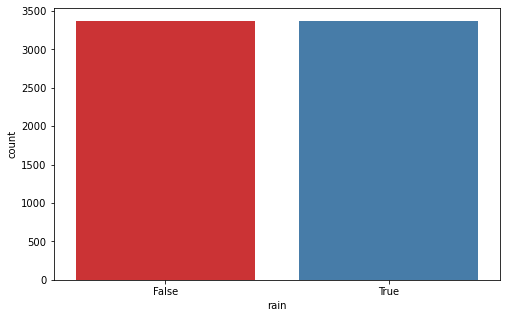

In [27]:
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="rain", data=data_resampled, palette="Set1")
plt.show()


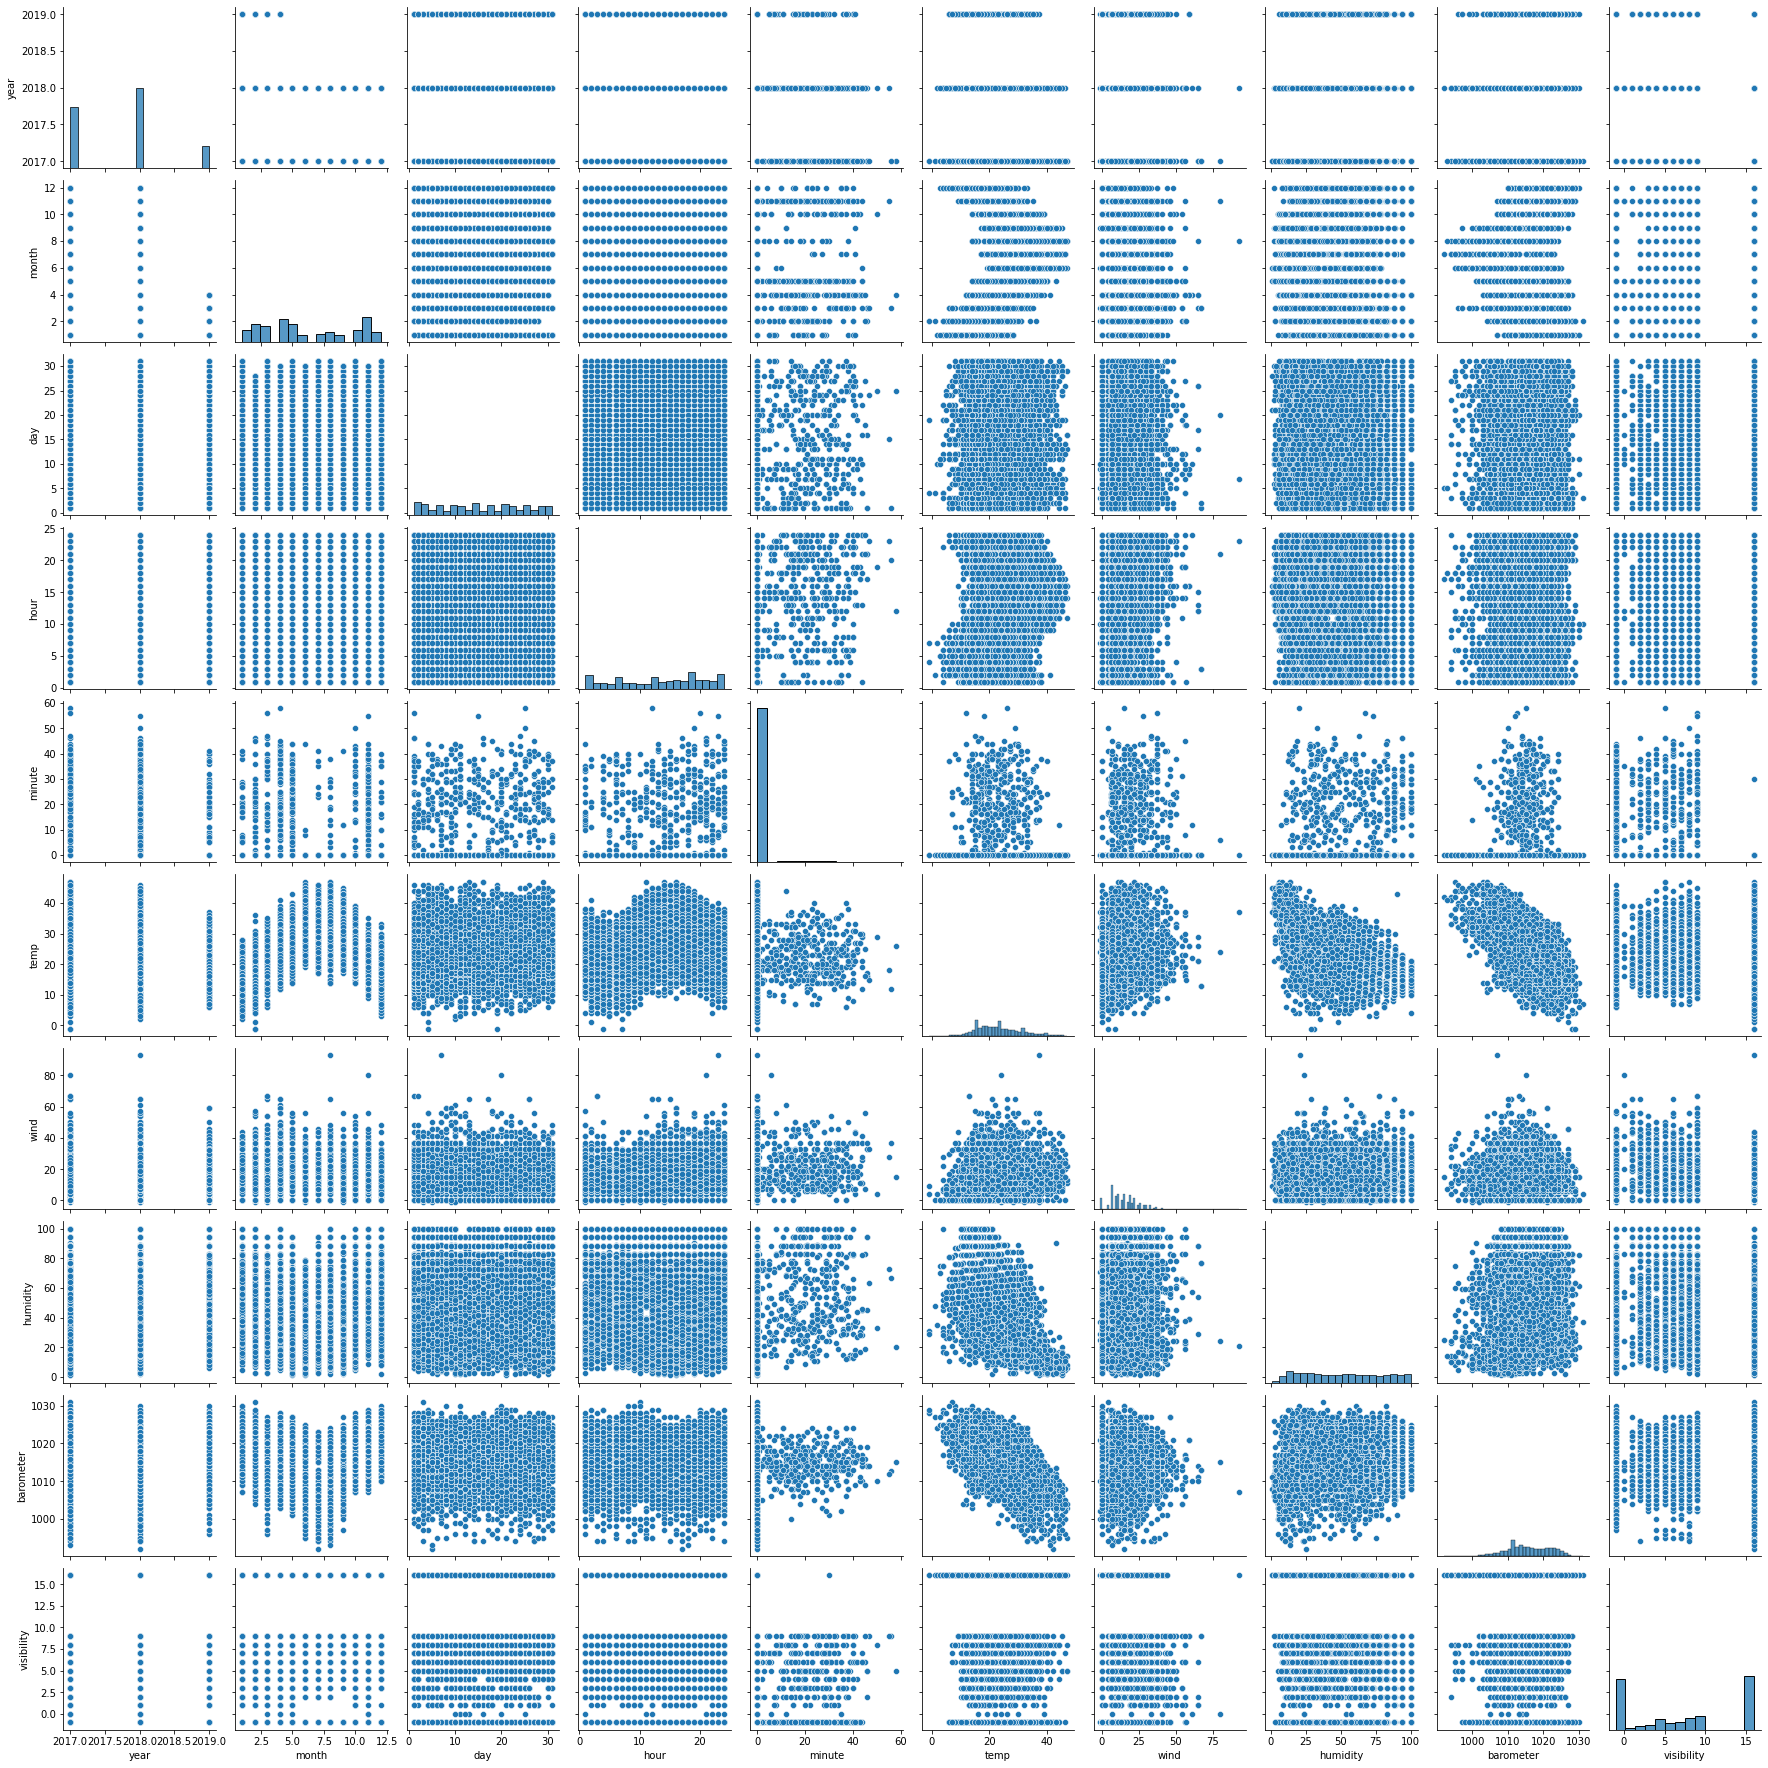

In [28]:
#rainsdata = ['rain'].value_counts()
sns.pairplot(X_resampled);

In [29]:
#new = pd.concat([X_resampled,y_resampled], axis =1)
#new

In [30]:
data_resampled['rain'].value_counts()

False    3369
True     3369
Name: rain, dtype: int64

In [31]:
 data['rain'].value_counts() 

False    245654
True       3369
Name: rain, dtype: int64

In [34]:
len(data['city'].unique()) , len(data_resampled['city'].unique())

(13, 13)

In [35]:
data_resampled['city'].value_counts()

Hail                657
Baha                655
Qassim              654
Jawf                600
Northern boarder    556
EP                  528
Najran              521
Riyadh              514
Jazan               489
Mecca               455
Tabuk               412
Madina              378
Assir               319
Name: city, dtype: int64

In [36]:
print(round(data_resampled.loc[:,'temp':'visibility'].describe()))


         temp    wind  humidity  barometer  visibility
count  6738.0  6738.0    6738.0     6738.0      6738.0
mean     23.0    16.0      52.0     1016.0         7.0
std       8.0    10.0      28.0        6.0         7.0
min      -1.0    -1.0       1.0      992.0        -1.0
25%      17.0     9.0      27.0     1011.0        -1.0
50%      22.0    15.0      51.0     1016.0         7.0
75%      28.0    22.0      76.0     1021.0        16.0
max      47.0    93.0     100.0     1031.0        16.0


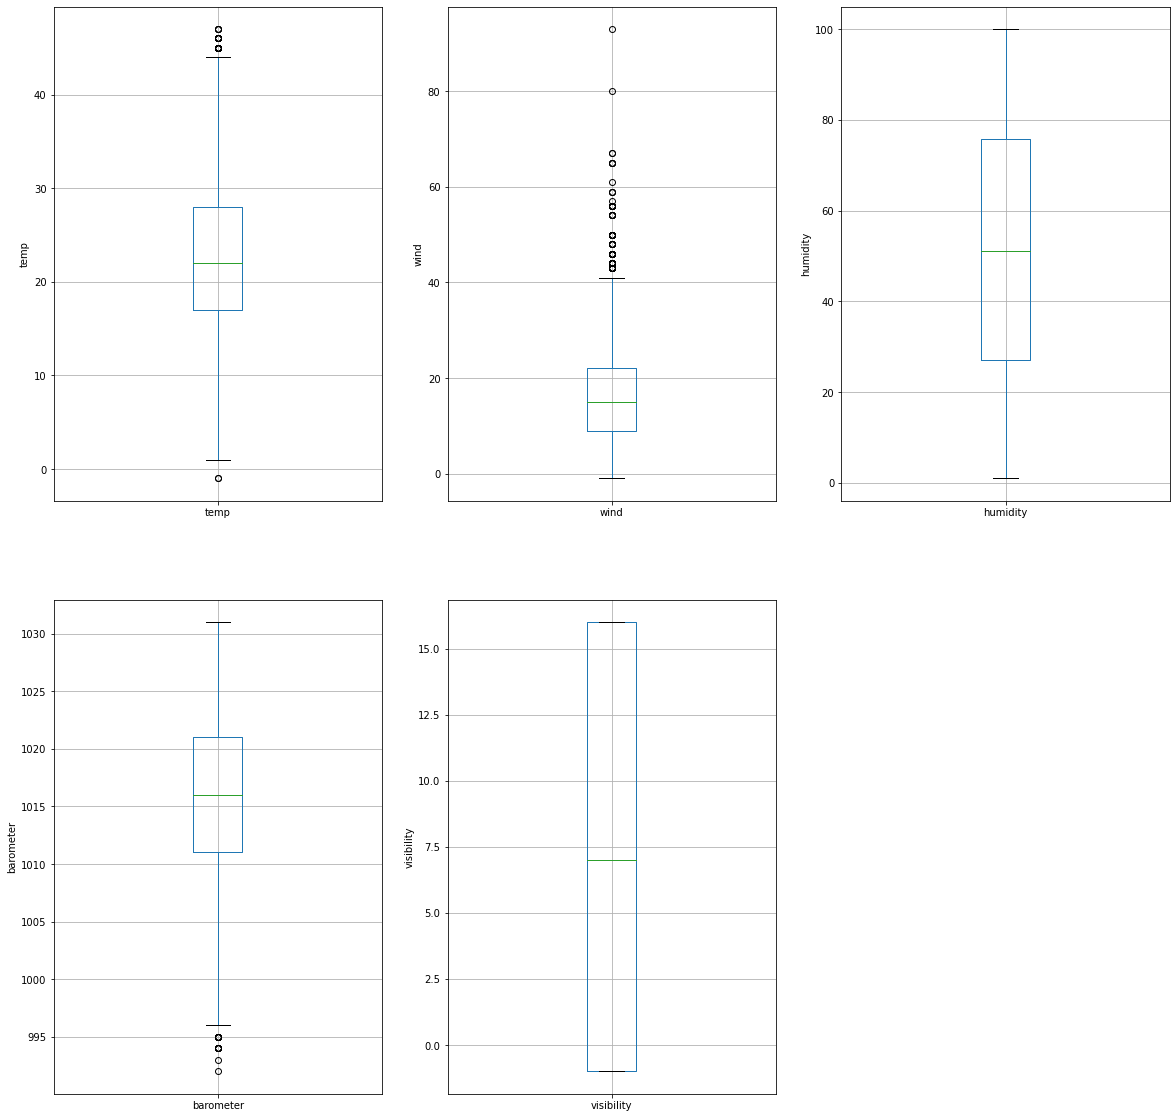

In [37]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,20))

plt.subplot(2, 3, 1)
fig = data_resampled.boxplot(column='temp')
fig.set_title('')
fig.set_ylabel('temp')

plt.subplot(2, 3, 2)
fig = data_resampled.boxplot(column='wind')
fig.set_title('')
fig.set_ylabel('wind')

plt.subplot(2, 3, 3)
fig = data_resampled.boxplot(column='humidity')
fig.set_title('')
fig.set_ylabel('humidity')


plt.subplot(2, 3, 4)
fig = data_resampled.boxplot(column='barometer')
fig.set_title('')
fig.set_ylabel('barometer')


plt.subplot(2, 3, 5)
fig = data_resampled.boxplot(column='visibility')
fig.set_title('')
fig.set_ylabel('visibility');

In [ ]:
#sample = data.loc[:,'wind':'rain'].sample(10000)

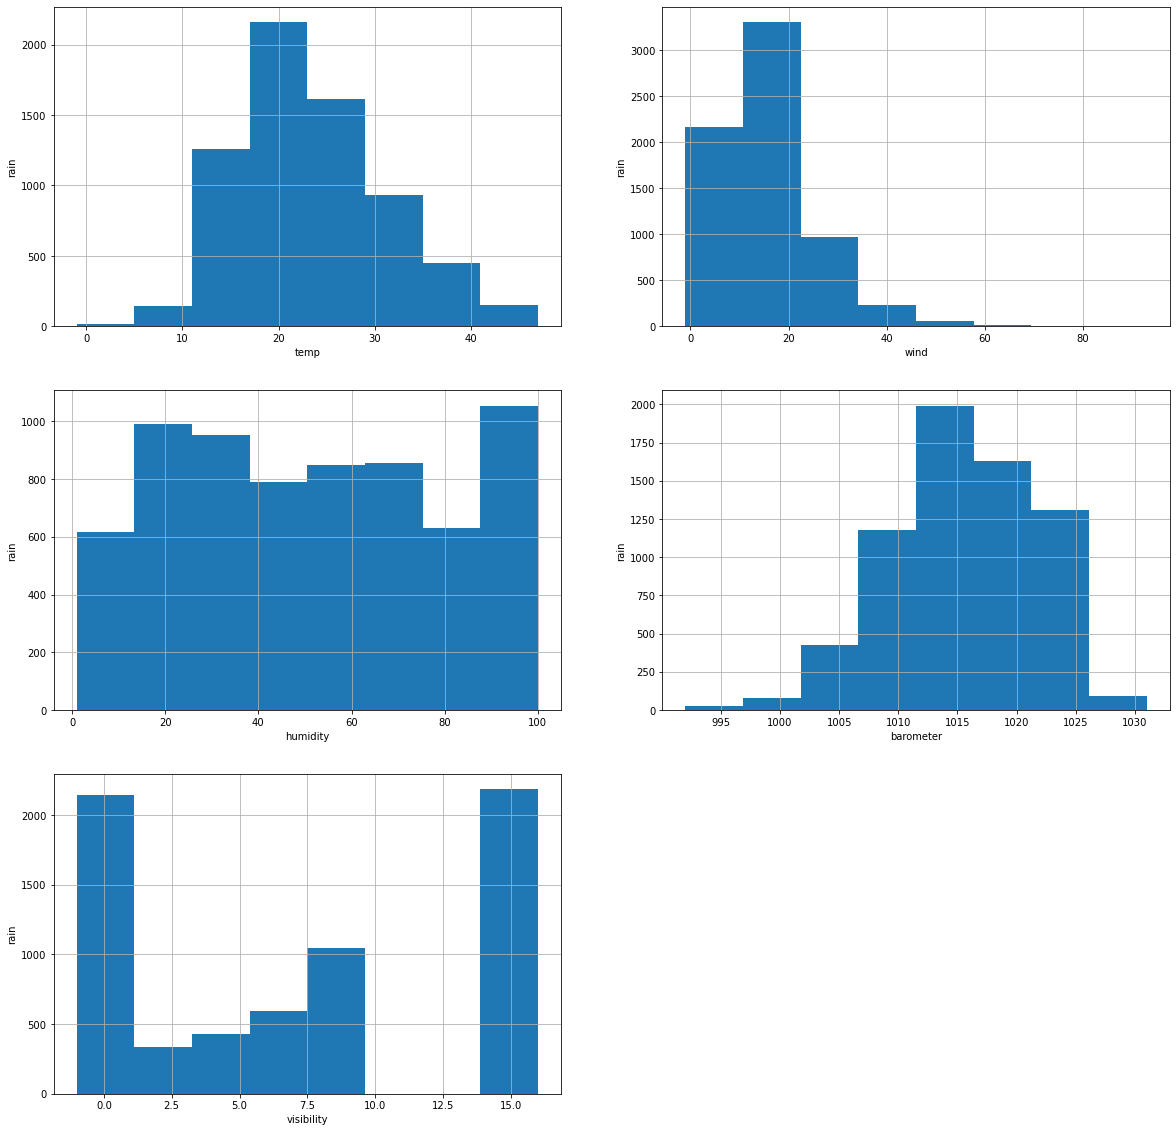

In [38]:

plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
fig = data_resampled.temp.hist(bins=8);
fig.set_xlabel('temp')
fig.set_ylabel('rain')

plt.subplot(3, 2, 2)
fig = data_resampled.wind.hist(bins=8);
fig.set_xlabel('wind')
fig.set_ylabel('rain')

plt.subplot(3, 2, 3)
fig = data_resampled.humidity.hist(bins=8);
fig.set_xlabel('humidity')
fig.set_ylabel('rain')


plt.subplot(3, 2, 4)
fig = data_resampled.barometer.hist(bins=8);
fig.set_xlabel('barometer')
fig.set_ylabel('rain')

plt.subplot(3, 2, 5)
fig = data_resampled.visibility.hist(bins=8);
fig.set_xlabel('visibility')
fig.set_ylabel('rain');

/Users/ALORFI/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ALORFI/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


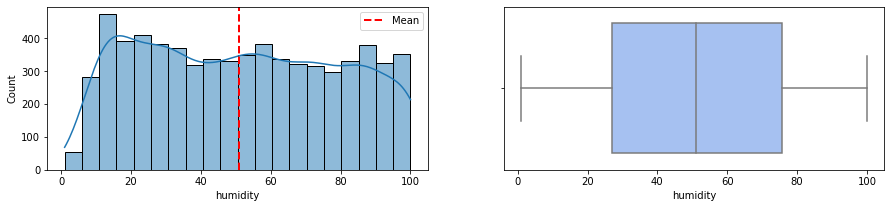

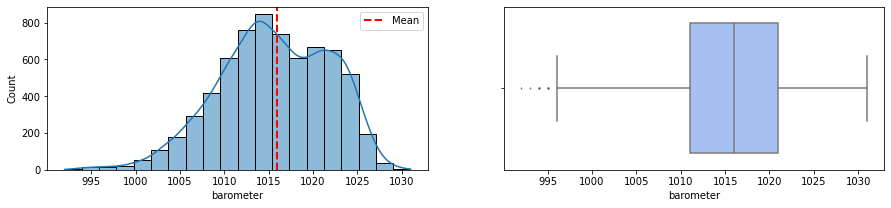

In [39]:
num_cols=data_resampled.loc[:,['humidity','barometer']].select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data_resampled[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data_resampled[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(data_resampled[i].median(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

In [ ]:
data_reshape.describe()

We can see that temp is nearly good distrubutied but all other four variables are skewed. So, I will use interquantile range to find outliers.

In [42]:
# find outliers for wind variable

IQR = data_resampled['wind'].quantile(0.75) - data_resampled['wind'].quantile(0.25)
Lower_fence = data_resampled['wind'].quantile(0.25) - (IQR * 3)
Upper_fence = data_resampled['wind'].quantile(0.75) + (IQR * 3)
print('Wind outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Wind outliers are values < -30.0 or > 61.0


In [41]:
# find outliers for visibility variable

IQR = data_resampled['visibility'].quantile(0.75) - data_resampled['visibility'].quantile(0.25)
Lower_fence = data_resampled['visibility'].quantile(0.25) - (IQR * 3)
Upper_fence = data_resampled['visibility'].quantile(0.75) + (IQR * 3)
print('Visibility outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



Visibility outliers are values < -52.0 or > 67.0


In [40]:
# find outliers for humidity variable

IQR = data_resampled['humidity'].quantile(0.75) - data_resampled['humidity'].quantile(0.25)
Lower_fence = data_resampled['humidity'].quantile(0.25) - (IQR * 3)
Upper_fence = data_resampled['humidity'].quantile(0.75) + (IQR * 3)
print('humidity outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))



humidity outliers are values < -119.25 or > 222.0


In [ ]:
#sns.pairplot(sample, hue="rain",plot_kws={'alpha': 0.7,'s':50},diag_kind='kde');

In [43]:
correlation = data_resampled.corr()



<AxesSubplot:>

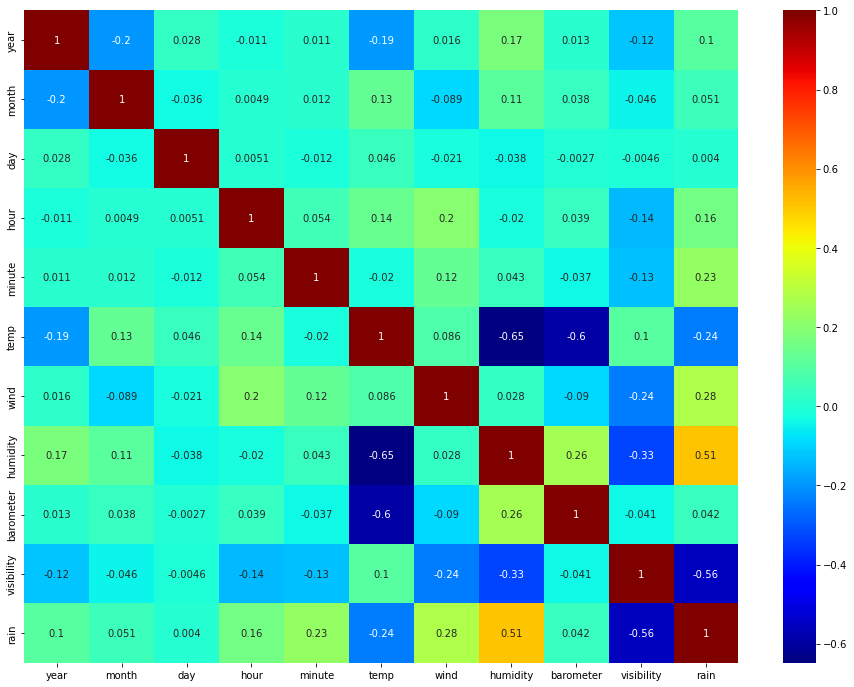

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation,cmap='jet',annot=True)

### 4 . Modeling

In [45]:
#X = data_reshape.drop(['rain'], axis=1)
#y = data_reshape['rain']

In [46]:
c = pd.get_dummies(X_resampled['city'], drop_first=True)


In [47]:
X_reshape  = pd.concat([c,X_resampled], axis=1 )


In [48]:
X_reshape.drop('city' , axis =1 , inplace= True)

In [49]:
X_reshape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Baha              6738 non-null   uint8  
 1   EP                6738 non-null   uint8  
 2   Hail              6738 non-null   uint8  
 3   Jawf              6738 non-null   uint8  
 4   Jazan             6738 non-null   uint8  
 5   Madina            6738 non-null   uint8  
 6   Mecca             6738 non-null   uint8  
 7   Najran            6738 non-null   uint8  
 8   Northern boarder  6738 non-null   uint8  
 9   Qassim            6738 non-null   uint8  
 10  Riyadh            6738 non-null   uint8  
 11  Tabuk             6738 non-null   uint8  
 12  year              6738 non-null   int64  
 13  month             6738 non-null   int64  
 14  day               6738 non-null   int64  
 15  hour              6738 non-null   int64  
 16  minute            6738 non-null   int64  


In [51]:
y_reshape =y_resampled

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size = 0.20, random_state = 42)

In [53]:
X_train.shape, X_test.shape

((5390, 22), (1348, 22))

In [54]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['wind'] = max_value(df3, 'wind', 61.0)
    df3['visibility'] = max_value(df3, 'visibility', 67.0)
    df3['humidity'] = max_value(df3, 'humidity', 222.0)


In [78]:
num_cols=X_train.loc[:,['humidity','barometer']].select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(X_train[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df3[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(X_train[i].median(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [67]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
#lg = LogisticRegression(C=10)
lg = LogisticRegression(solver= 'liblinear', C=1000)



# fit the model
lg.fit(X_train, y_train)


LogisticRegression(C=1000, solver='liblinear')

In [68]:
lg.predict(X_train)

array([False, False, False, ...,  True,  True, False])

In [69]:
y_pred_test = lg.predict(X_test)

In [70]:
lg.score(X_train, y_train)

0.8411873840445269

In [71]:
lg.score(X_test, y_test)

0.8419881305637982

In [72]:
from sklearn.metrics import accuracy_score


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8420


In [73]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, y_test)))


Training set score: 0.8412
Test set score: 0.8420


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.87      0.82      0.84       704
        True       0.82      0.86      0.84       644

    accuracy                           0.84      1348
   macro avg       0.84      0.84      0.84      1348
weighted avg       0.84      0.84      0.84      1348



In [66]:
# confusing Matrixx